In [1]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

**Importing the dataset**

In [3]:
df= pd.read_csv("/content/Social_Network_Ads.csv")

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.shape

(400, 5)

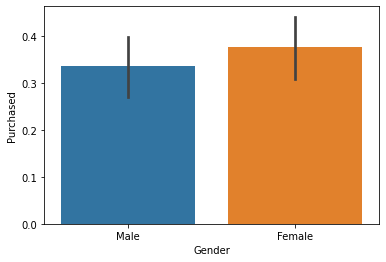

In [6]:
import seaborn as sns
sns.barplot(x= df["Gender"], y= df["Purchased"],order= df.groupby("Gender")["Purchased"].mean().reset_index().sort_values("Purchased")["Gender"])

In [7]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

###ENCODING

In [8]:
df["Gender"]= df["Gender"].map({'Male':1,'Female': 2 })

In [9]:
df= df.drop(columns=["User ID"], axis= 1)

In [10]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,2,46,41000,1
396,1,51,23000,1
397,2,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [11]:
from sklearn.model_selection import train_test_split
X= df.drop(columns= "Purchased", axis= 1)
Y = df['Purchased'].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state= 10)

**Feature Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)                
  knn.fit(X_train, Y_train)
  print("K value  :", i,"Accuracy: ", metrics.accuracy_score(Y_test, knn.predict(X_test)), "Cross_val_score:" , np.mean(cross_val_score(knn, X_train, Y_train, cv=10)))

K value  : 1 Accuracy:  0.9166666666666666 Cross_val_score: 0.8357142857142857
K value  : 2 Accuracy:  0.9083333333333333 Cross_val_score: 0.8321428571428573
K value  : 3 Accuracy:  0.9166666666666666 Cross_val_score: 0.875
K value  : 4 Accuracy:  0.9166666666666666 Cross_val_score: 0.8642857142857144
K value  : 5 Accuracy:  0.9166666666666666 Cross_val_score: 0.9071428571428571
K value  : 6 Accuracy:  0.925 Cross_val_score: 0.9035714285714287
K value  : 7 Accuracy:  0.9166666666666666 Cross_val_score: 0.9035714285714287
K value  : 8 Accuracy:  0.9166666666666666 Cross_val_score: 0.9
K value  : 9 Accuracy:  0.9166666666666666 Cross_val_score: 0.9
K value  : 10 Accuracy:  0.925 Cross_val_score: 0.9
K value  : 20 Accuracy:  0.925 Cross_val_score: 0.875
K value  : 30 Accuracy:  0.875 Cross_val_score: 0.8214285714285715
K value  : 40 Accuracy:  0.85 Cross_val_score: 0.8035714285714285
K value  : 50 Accuracy:  0.85 Cross_val_score: 0.7607142857142857


###EVALUATION

In [14]:
knn= KNeighborsClassifier(n_neighbors=6)                
knn.fit(X_train, Y_train)
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(Y_test, knn.predict(X_test)))
print("Cross Val Score :" , np.mean(cross_val_score(knn, X_train, Y_train, cv=10)))


Accuracy:  0.925
Cross Val Score : 0.9035714285714287


**Predicting the Test set results**

In [15]:
predict=knn.predict(X_test)
predict

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [16]:
pred= knn.predict_proba(X_test)
pred

array([[0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.16666667, 0.83333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

**Making the Confusion Matrix**

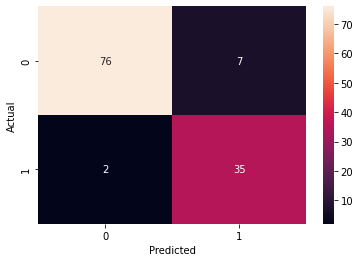

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predict)
confusion_matrix = pd.crosstab(Y_test, predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)